# Fun with spaCy and NLP: A Beginner’s Guide

Welcome to this interactive Jupyter Notebook tutorial on spaCy and Natural Language Processing (NLP). In this guide, we’ll break down the basics—from installing spaCy and tokenizing text to performing part-of-speech (POS) tagging, named entity recognition (NER), dependency parsing, lemmatization, and even creating word clouds to visualize word frequency.

> **Tip:** Run each code cell one by one, read the explanations, and experiment with the code to learn by doing!

## 1. Introduction to spaCy and NLP

**spaCy** is an open-source NLP library designed for efficient and production-ready text processing. With spaCy, you can:

-   **Tokenize** text (i.e., break sentences into words and punctuation).
-   Identify and label parts-of-speech (POS) like nouns, verbs, adjectives, etc.
-   Recognize **Named Entities** (e.g., person names, organizations, dates).
-   Parse the grammatical structure of sentences (dependency parsing).
-   Perform **lemmatization** (reduce words to their base form).

**NLP (Natural Language Processing)** teaches computers to understand and work with human language, which powers everything from chatbots to language translators.

## 2. Installing spaCy and Required Libraries

### 2.1 Using pip

In a Jupyter Notebook cell, run the following commands to update your packaging tools and install spaCy:

```python
# You can run shell commands in a Jupyter cell by prefixing with "!"
!pip install -U pip setuptools wheel
!pip install -U spacy

### 2.2 Using Conda

If you prefer Conda, run:

```python
!conda install -c conda-forge spacy --yes
```

### 2.3 Installing a Language Model

spaCy requires language models to work with text. Here’s how to install a small English model:

```python
!python -m spacy download en_core_web_sm

## 3. Loading spaCy and a Language Model

Let’s import spaCy and load the English language model. This model helps spaCy understand English text.

In [32]:
import spacy  # Import the spaCy library


In [33]:
# Load the small English model. We use a descriptive variable name 'nlp' (short for Natural Language Processing)
nlp = spacy.load("en_core_web_sm")

In [34]:
# Process a sample text using the loaded model.
doc: spacy.tokens.Doc = nlp("spaCy is an amazing NLP library!")

In [35]:
# Let's print out each token (word or punctuation) in our processed document.
print("Tokens:", [token.text for token in doc])

Tokens: ['spaCy', 'is', 'an', 'amazing', 'NLP', 'library', '!']


**What’s happening?**

-   We import spaCy.
-   We load a pre-trained English model called `en_core_web_sm`.
-   The `nlp` object processes our text, returning a `Doc` object.
-   We loop through the tokens in `doc` and print their text.

## 4. Tokenization: Breaking Down Text
Tokenization splits your text into meaningful units (tokens).

In [36]:
# Let's create a new document from a different sentence.
doc1 = nlp("spaCy is great for various NLP tasks!")

In [37]:
# Print each token. Notice that punctuation marks are treated as separate tokens.
tokens = [token.text for token in doc1]
print("Tokens:", tokens)

Tokens: ['spaCy', 'is', 'great', 'for', 'various', 'NLP', 'tasks', '!']


**Explanation:**

-   We process a new sentence.
-   A list comprehension gathers all token texts.
-   This makes it easy for beginners to see how text is divided.

## 5. Part-of-Speech (POS) Tagging

POS tagging labels each token with its grammatical role (noun, verb, adjective, etc.). We’ll also print both the simple POS and the detailed tag.

In [38]:
# Loop through each token in our document and print its POS information.
for token in doc1:
    # token.pos_ gives the simplified POS tag and token.tag_ gives the detailed tag.
    print(f"{token.text:10} -> {token.pos_:6} ({token.tag_})")

spaCy      -> NUM    (CD)
is         -> AUX    (VBZ)
great      -> ADJ    (JJ)
for        -> ADP    (IN)
various    -> ADJ    (JJ)
NLP        -> PROPN  (NNP)
tasks      -> NOUN   (NNS)
!          -> PUNCT  (.)


**Explanation:**

-   The loop goes through every token in `doc1`.
-   We use f‑strings (modern Python syntax) to format the output.
-   The `:10` in the f‑string ensures the token text is printed in a field 10 characters wide for better alignment.

## 6. Named Entity Recognition (NER)
NER extracts and labels important entities like persons, organizations, and locations.



In [40]:
# Sample text with multiple entities.
text = "Apple was founded by Steve Jobs in California."
doc2 = nlp(text)

In [41]:
# Loop through the entities recognized in the text.
for ent in doc2.ents:
    # spacy.explain() provides a friendly explanation for the entity label.
    print(f"{ent.text:12} -> {ent.label_:6} ({spacy.explain(ent.label_)})")

Apple        -> ORG    (Companies, agencies, institutions, etc.)
Steve Jobs   -> PERSON (People, including fictional)
California   -> GPE    (Countries, cities, states)


**What’s happening?**

-   We create a new document with company names, person names, and locations.
-   We iterate over the `.ents` attribute of the document to print each entity, its label, and a brief explanation.

## 7. Dependency Parsing

Dependency parsing shows how words in a sentence relate to each other.

In [42]:
# Let's examine the dependency structure of our original doc.
for token in doc:
    # Each token is printed along with its dependency relation and the text of its head (the word it is connected to).
    print(f"{token.text:10} -> {token.dep_:10} (head: {token.head.text})")

spaCy      -> nsubj      (head: is)
is         -> ROOT       (head: is)
an         -> det        (head: library)
amazing    -> amod       (head: library)
NLP        -> compound   (head: library)
library    -> attr       (head: is)
!          -> punct      (head: is)


**Explanation:**

-   We loop through each token in `doc`.
-   `token.dep_` shows the syntactic relation (e.g., subject, object).
-   `token.head.text` indicates the token’s parent word in the dependency tree.

## 8. Lemmatization: Getting the Base Form

Lemmatization reduces words to their base or dictionary form.

In [44]:
# Display each token alongside its lemma.
print("Original vs. Lemma:")
for token in doc:
    print(f"{token.text:10} -> {token.lemma_}")

Original vs. Lemma:
spaCy      -> spacy
is         -> be
an         -> an
amazing    -> amazing
NLP        -> NLP
library    -> library
!          -> !


**Explanation:**

-   We iterate through each token in `doc` and print both the original word and its lemma.
-   This is useful for normalization and reducing word variants.

## 9. Stopword Removal

Stopwords are common words (like “is”, “the”, etc.) that are usually removed from text analysis.

In [46]:
from spacy.lang.en.stop_words import STOP_WORDS

# Filter out tokens that are stopwords.
filtered_tokens = [token.text for token in doc if not token.is_stop]

print("Original text:", doc.text)
print("Filtered tokens (without stopwords):", filtered_tokens)

Original text: spaCy is an amazing NLP library!
Filtered tokens (without stopwords): ['spaCy', 'amazing', 'NLP', 'library', '!']


**Explanation:**

-   We import the list of stopwords.
-   The list comprehension checks each token with `token.is_stop`.
-   Only tokens that are not stopwords are included.

## 10. Custom Named Entity Recognition

You can add your own entities using spaCy’s `EntityRuler`. This is useful when you want to recognize terms that aren’t covered by the default model.

In [48]:
from spacy.pipeline import EntityRuler

# Reload the English model (or use your existing one).
nlp = spacy.load("en_core_web_sm")

In [49]:
# Add the EntityRuler to the pipeline before the built-in NER component.
ruler = nlp.add_pipe("entity_ruler", before="ner")

In [50]:
# Define custom patterns. Here, we define "spaCy" as a SOFTWARE entity.
patterns = [{"label": "SOFTWARE", "pattern": "spaCy"}]
ruler.add_patterns(patterns)

In [51]:
# Process a sentence to see our custom entity in action.
doc_custom = nlp("spaCy is a great NLP tool.")
print("Custom Entities:", [(ent.text, ent.label_) for ent in doc_custom.ents])

Custom Entities: [('spaCy', 'SOFTWARE'), ('NLP', 'ORG')]


**Explanation:**

-   We add an `EntityRuler` to the spaCy pipeline.
-   We define a pattern that tells spaCy to label the word “spaCy” as a `SOFTWARE`.
-   We then process a sentence to verify that our custom entity is detected.

## 11. Saving and Loading Custom Models

After training or customizing your model, you can save it to disk and load it later.

In [53]:
# Save the current spaCy pipeline to disk.
nlp.to_disk("my_spacy_model")


In [55]:
# Later, load your custom model from disk.
nlp_custom = spacy.load("my_spacy_model")

**Explanation:**

-   `to_disk` saves the entire pipeline (model, rules, etc.) into a folder.
-   `spacy.load` can then be used to reload your saved model.

## 12. Exporting Processed Data

Sometimes you may want to export the processed data (tokens, lemmas, POS tags) to work with in other programs.

In [56]:
import json  # Import the JSON library for formatting output


In [57]:
# Create a list of dictionaries for each token in doc2.
export_data = [
    {"text": token.text, "lemma": token.lemma_, "pos": token.pos_}
    for token in doc2
]

In [58]:
# Pretty-print the exported data as JSON.
print("Exported Data:")
print(json.dumps(export_data, indent=2))

Exported Data:
[
  {
    "text": "Apple",
    "lemma": "Apple",
    "pos": "PROPN"
  },
  {
    "text": "was",
    "lemma": "be",
    "pos": "AUX"
  },
  {
    "text": "founded",
    "lemma": "found",
    "pos": "VERB"
  },
  {
    "text": "by",
    "lemma": "by",
    "pos": "ADP"
  },
  {
    "text": "Steve",
    "lemma": "Steve",
    "pos": "PROPN"
  },
  {
    "text": "Jobs",
    "lemma": "Jobs",
    "pos": "PROPN"
  },
  {
    "text": "in",
    "lemma": "in",
    "pos": "ADP"
  },
  {
    "text": "California",
    "lemma": "California",
    "pos": "PROPN"
  },
  {
    "text": ".",
    "lemma": ".",
    "pos": "PUNCT"
  }
]


**Explanation:**

-   We build a list comprehension that creates a dictionary for each token.
-   The JSON output is formatted with an indent for easy reading.

## 13. Creating Word Clouds

Word clouds visually represent word frequency in text. We'll use the [`wordcloud`](https://github.com/amueller/word_cloud) library along with matplotlib for this.

> **Note:** If you haven’t installed the wordcloud library, run:
> 
> ```python
> !pip install wordcloud
> 
> ```

Now let’s generate a word cloud from our processed text.

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Choose some sample text.
sample_text = (
    "Natural Language Processing is fun and exciting. "
    "SpaCy makes it simple to build real-world NLP applications. "
    "Learning NLP with spaCy is a great way to get started with artificial intelligence."
)

In [61]:
# Create a WordCloud object.
# We use f-strings and keyword arguments to customize the appearance.
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(sample_text)

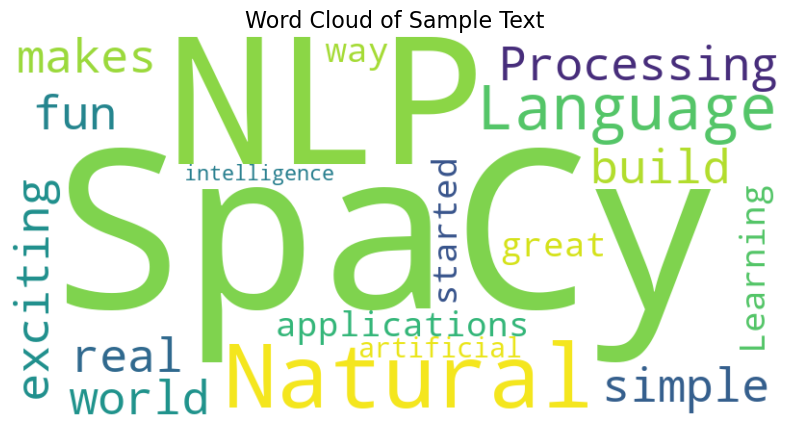

In [62]:
# Display the generated word cloud using matplotlib.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis lines and labels
plt.title("Word Cloud of Sample Text", fontsize=16)
plt.show()

**Explanation:**

-   We import the WordCloud and matplotlib libraries.
-   A sample text string is defined.
-   A `WordCloud` object is created with modern keyword arguments for dimensions, background color, and a colormap.
-   `generate()` builds the word cloud from the text.
-   Finally, we display the image with matplotlib.

## Final Thoughts

This tutorial has introduced you to:

-   **spaCy basics:** Loading models, tokenization, POS tagging, NER, dependency parsing, lemmatization, and stopword removal.
-   **Customizing spaCy:** Adding custom entities, saving, and loading models.
-   **Data export:** Converting processed data to JSON.
-   **Word Clouds:** Visualizing text data in a fun and intuitive way.

Feel free to experiment with different texts and spaCy features. NLP is a vast field—this guide is just the beginning of your exploration into how machines can understand human language!

Happy coding and exploring NLP with spaCy!